In [1]:
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
import pickle
from datetime import date

from src.utils import get_framed_label, train_test_split
from src.data import load_annotation
from src.data import load_radar, load_water_distance, load_weight_sensor, load_audio
from src import make_dataset
import config

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, plot_roc_curve

In [2]:
def classification_result(model, testX, testY, threshold = 0.5):
    testYPredProb = model.predict_proba(testX)
    testYPred = (testYPredProb[:, 1] > threshold).astype(int)
    print (f"threshold = {threshold}", "\n")
    print (classification_report(testY, testYPred))
    
def variable_importance(trainX, model, top=30):
    plt.figure(figsize=(20, 5))
    plt.bar(x = range(top), height = model.feature_importances_[:top])
    xticks_pos = np.arange(top)
    plt.xticks(xticks_pos, trainX.columns[:top], rotation=45, ha = 'right')
    pass

# Urination

In [3]:
CATEGORY = "Urination"
dataset_config = config.DATASET_CONFIG[CATEGORY]
complete_ids = load_annotation.get_complete_ids(
    category = CATEGORY
)

In [4]:
selected_ids = complete_ids[:60]
TRAIN_IDS, TEST_IDS = train_test_split(selected_ids, seed=1234)

print(f"Category: {CATEGORY}")
print(f"Training {len(TRAIN_IDS)} use_ids: {TRAIN_IDS[:5]}...")
print(f"Testing  {len(TEST_IDS)} use_ids: {TEST_IDS[:5]}...")

Category: Urination
Training 48 use_ids: [1880, 1897, 1831, 1871, 1829]...
Testing  12 use_ids: [1835, 1841, 1863, 1874, 1875]...


In [5]:
train_config = dataset_config.copy()
test_config = dataset_config.copy()

train_config['USER_IDS'] = TRAIN_IDS
test_config['USER_IDS'] = TEST_IDS

dataset = {}
dataset['train'] = make_dataset.RandomForestExtended(train_config)
dataset['test'] = make_dataset.RandomForestExtended(test_config)

In [6]:
# it may take around 20min to run
train_x, train_y = dataset['train'].get_features_and_labels_from_users()
test_x, test_y = dataset['test'].get_features_and_labels_from_users()

  0%|          | 0/48 [00:00<?, ?it/s]

updating 1898 failed


  0%|          | 0/12 [00:00<?, ?it/s]

In [7]:
print(f"train_x.shape = {train_x.shape}, test_x.shape = {test_x.shape}")
print(f"#positive/#total train_y = {sum(train_y)}/{len(train_y)}")
print(f"#positive/#total test_y = {sum(test_y)}/{len(test_y)}")

train_x.shape = (4292, 402), test_x.shape = (1376, 402)
#positive/#total train_y = 708/4292
#positive/#total test_y = 218/1376


In [8]:
rf = RandomForestClassifier(n_estimators = 30)
rf.fit(train_x, train_y)

RandomForestClassifier(n_estimators=30)

In [9]:
classification_result(
    rf,
    test_x, test_y,
    threshold = 0.3
)

threshold = 0.3 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1158
           1       0.93      0.78      0.85       218

    accuracy                           0.96      1376
   macro avg       0.95      0.89      0.91      1376
weighted avg       0.96      0.96      0.96      1376



In [10]:
classification_result(
    rf,
    test_x, test_y,
    threshold = 0.2
)

threshold = 0.2 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1158
           1       0.86      0.82      0.84       218

    accuracy                           0.95      1376
   macro avg       0.91      0.90      0.90      1376
weighted avg       0.95      0.95      0.95      1376



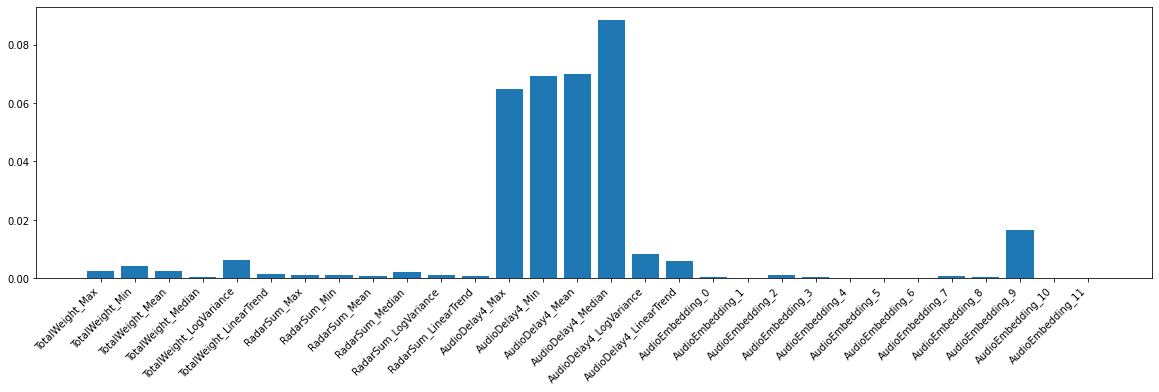

In [11]:
variable_importance(train_x, rf)

In [12]:
current_time = date.today().strftime("%Y-%m-%d")
model_name = f"../models/urination-rf-extended-embedding-{current_time}.pkl"

with open(model_name, "wb") as f:
    pickle.dump(rf, f)

# Defecation

In [13]:
CATEGORY = "Defecation"
dataset_config = config.DATASET_CONFIG[CATEGORY]
complete_ids = load_annotation.get_complete_ids(
    category = CATEGORY
)

In [14]:
selected_ids = [idx for idx in complete_ids if idx <= 1950 and idx >= 1800]
TRAIN_IDS, TEST_IDS = train_test_split(selected_ids)

print(f"Category: {CATEGORY}")
print(f"Training {len(TRAIN_IDS)} use_ids: {TRAIN_IDS[:5]}...")
print(f"Testing  {len(TEST_IDS)} use_ids: {TEST_IDS[:5]}...")

Category: Defecation
Training 23 use_ids: [1898, 1930, 1919, 1926, 1941]...
Testing  6 use_ids: [1854, 1870, 1875, 1882, 1890]...


In [15]:
train_config = dataset_config.copy()
test_config = dataset_config.copy()

train_config['USER_IDS'] = TRAIN_IDS
test_config['USER_IDS'] = TEST_IDS

dataset = {}
dataset['train'] = make_dataset.RandomForestExtended(train_config)
dataset['test'] = make_dataset.RandomForestExtended(test_config)

In [16]:
train_x, train_y = dataset['train'].get_features_and_labels_from_users()
test_x, test_y = dataset['test'].get_features_and_labels_from_users()

  0%|          | 0/23 [00:00<?, ?it/s]

updating 1898 failed


  0%|          | 0/6 [00:00<?, ?it/s]

In [17]:
print(f'train_x.shape: {train_x.shape} test_x.shape: {test_x.shape}')
print(f'No. Positive in training {train_y.sum()}/{train_y.shape}')
print(f'No. Positive in testing  {test_y.sum()}/{test_y.shape}')

train_x.shape: (3390, 402) test_x.shape: (1065, 402)
No. Positive in training 147/(3390,)
No. Positive in testing  37/(1065,)


In [18]:
rf = RandomForestClassifier(
    n_estimators = 10,
    class_weight = "balanced"
)
rf.fit(train_x, train_y)

RandomForestClassifier(class_weight='balanced', n_estimators=10)

In [19]:
classification_result(
    rf,
    test_x, test_y,
    threshold = 0.3
)

threshold = 0.3 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1028
           1       0.62      0.65      0.63        37

    accuracy                           0.97      1065
   macro avg       0.80      0.82      0.81      1065
weighted avg       0.97      0.97      0.97      1065



In [20]:
classification_result(
    rf,
    test_x, test_y,
    threshold = 0.4
)

threshold = 0.4 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1028
           1       0.61      0.54      0.57        37

    accuracy                           0.97      1065
   macro avg       0.79      0.76      0.78      1065
weighted avg       0.97      0.97      0.97      1065



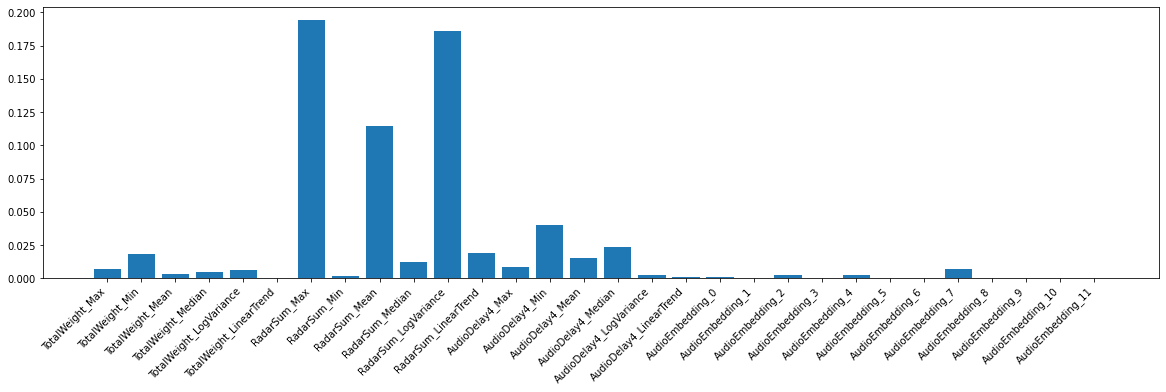

In [21]:
variable_importance(train_x, rf)

In [22]:
current_time = date.today().strftime("%Y-%m-%d")
model_name = f"../models/defecation-rf-extended-embedding-{current_time}.pkl"

with open(model_name, "wb") as f:
    pickle.dump(rf, f)